# 1 - Importação dos Módulos

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# 2 - Preparação dos Dados

In [15]:
# Transformação: converte imagem para tensor e normaliza os pixels (0 a 1)
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.5,), (0.5,))
])

# Download dos dados (se ainda não estiverem na máquina)
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# DataLoaders: carregam os dados em mini-batches
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)


# 3 - Criando o Modelo (Rede Neural)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)   # Entrada -> camada escondida 1
        self.fc2 = nn.Linear(128, 64)      # Escondida 1 -> escondida 2
        self.fc3 = nn.Linear(64, 10)       # Escondida 2 -> saída (10 classes)

    def forward(self, x):
        x = x.view(-1, 28*28)             # Achata imagem (de 28x28 para 784)
        x = F.relu(self.fc1(x))           # Ativação ReLU
        x = F.relu(self.fc2(x))           
        x = self.fc3(x)                   # Saída sem ativação (usaremos CrossEntropy)
        return x

model = Net()

# 5 - Funçao de perda e otimizador

In [17]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# 6 - Treinamento do Modelo

In [18]:
for epoch in range(5):  # 5 épocas de treino
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()            # Zera os gradientes anteriores
        outputs = model(images)          # Forward
        loss = criterion(outputs, labels)# Calcula erro
        loss.backward()                  # Backpropagation
        optimizer.step()                 # Atualiza pesos
        
        running_loss += loss.item()
    print(f'Época {epoch+1} - Loss: {running_loss:.4f}')


Época 1 - Loss: 413.7426
Época 2 - Loss: 169.1826
Época 3 - Loss: 119.4468
Época 4 - Loss: 98.8936
Época 5 - Loss: 83.8590


# 7 Avaliação no conjunto de teste

In [19]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Acurácia no teste: {100 * correct / total:.2f}%')


Acurácia no teste: 96.88%


# 8 - Visualizando Previsões

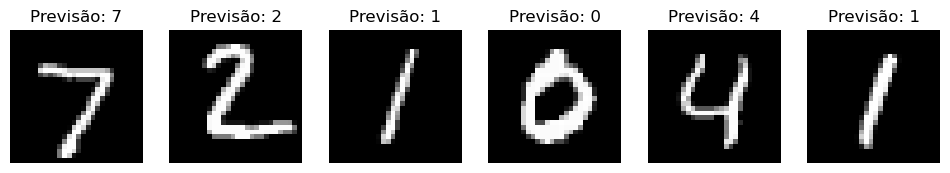

In [ ]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Pegamos as 6 primeiras imagens
fig, axes = plt.subplots(1, 6, figsize=(12, 2))
for i in range(6):
    img = images[i]
    ax = axes[i]
    ax.imshow(img.squeeze(), cmap='gray')
    output = model(img.unsqueeze(0))  # Adiciona dimensão de batch
    _, pred = torch.max(output, 1)
    ax.set_title(f'Previsão: {pred.item()}')
    ax.axis('off')
plt.show()